In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

# Load data

In [5]:
path = 'yelp_data/health_text_sentiment.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df = df[['stars','text',
 'clean_text']]

## select 1 & 5 stars

In [6]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
# data.stars.replace(1,0,inplace=True)
# data.stars.replace(5,1,inplace=True)

data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,1,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,5,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


## split


In [7]:
# split
X = data['text'].values.astype(str)
Xc = data['clean_text'].values.astype(str)

y = data['stars'].values

## train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## CountVectorizer

In [9]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## TfidfVectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# LinearSVC: CountVectorizer

In [11]:
svc_count_clf = LinearSVC()
svc_count_clf.fit(count_train, y_train)
pred = svc_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.966


## C value

In [12]:
c_results = dict()

c_values = np.arange(0.1,1,.1)
# c_values = np.around(c_values, decimals=2)
#c_values = [1,2,3,4,5,10,15,20]
c_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [13]:
for c in c_values:
    svc_count_clf = LinearSVC()
    svc_count_clf.fit(count_train, y_train)
    pred = svc_count_clf.predict(count_test)
    score = metrics.accuracy_score(y_test, pred)
    print("C value: {:.2f} Score: {:.5f}".format(c, score))
    c_results[c] = score

C value: 0.10 Score: 0.96593
C value: 0.20 Score: 0.96593
C value: 0.30 Score: 0.96593
C value: 0.40 Score: 0.96593
C value: 0.50 Score: 0.96581
C value: 0.60 Score: 0.96581
C value: 0.70 Score: 0.96598
C value: 0.80 Score: 0.96581
C value: 0.90 Score: 0.96598


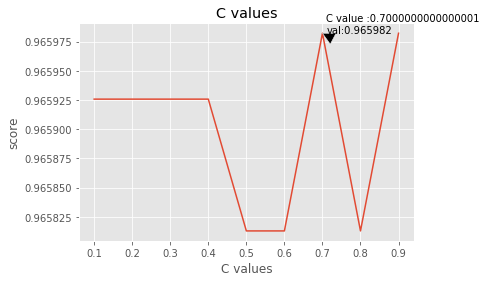

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(c_results.keys())
y=list(c_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'C value :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
            xytext=(xmax+.01,ymax)
            )
plt.title('C values')
plt.xlabel('C values')
plt.ylabel('score')
plt.show()

In [15]:
svc_count_clf = LinearSVC(C=0.7)
svc_count_clf.fit(count_train, y_train)
pred = svc_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.967


In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96      7241
           5       0.97      0.97      0.97     10485

   micro avg       0.97      0.97      0.97     17726
   macro avg       0.97      0.97      0.97     17726
weighted avg       0.97      0.97      0.97     17726



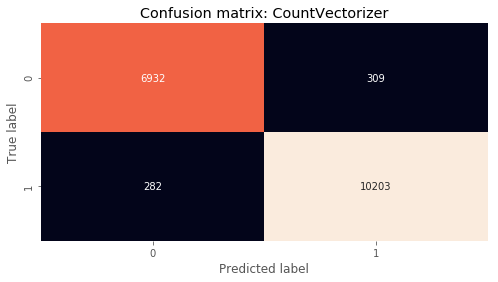

In [17]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix: CountVectorizer')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# LinearSVC: TfidfVectorizer

In [18]:
svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.975


In [51]:
c_results = dict()

c_values = np.arange(0.1,1.1,.1)
# c_values = np.around(c_values, decimals=2)
#c_values = [1,2,3,4,5,10,15,20]
c_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [46]:
c_results = dict()

c_values = np.arange(1,11,1)
# c_values = np.around(c_values, decimals=2)
c_values = [1,2,3,4,5,10,15,20]
c_values

[1, 2, 3, 4, 5, 10, 15, 20]

In [52]:
for c in c_values:
    svc_tfidf_clf = LinearSVC(C=c)
    svc_tfidf_clf.fit(tfidf_train, y_train)
    pred = svc_tfidf_clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    print("C value: {:.2f} Score: {:.5f}".format(c, score))
    c_results[c] = score

C value: 0.10 Score: 0.97264
C value: 0.20 Score: 0.97506
C value: 0.30 Score: 0.97580
C value: 0.40 Score: 0.97546
C value: 0.50 Score: 0.97523
C value: 0.60 Score: 0.97512
C value: 0.70 Score: 0.97484
C value: 0.80 Score: 0.97478
C value: 0.90 Score: 0.97433
C value: 1.00 Score: 0.97450


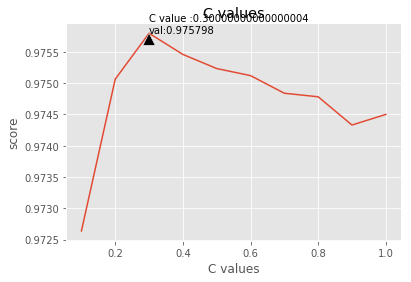

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(c_results.keys())
y=list(c_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'C value :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
            xytext=(xmax,ymax)
            )
plt.title('C values')
plt.xlabel('C values')
plt.ylabel('score')
plt.show()

In [54]:
svc_tfidf_clf = LinearSVC(C=0.3)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.976


## max_df values

In [59]:
dfrq_results = dict()

dfrq_range = np.arange(0.1,1.1,0.1)
dfrq_range = np.around(dfrq_range, decimals=2)
dfrq_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [60]:
for dfq in dfrq_range: 
    tfidf_vectorizer = TfidfVectorizer(max_df=dfq)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    svc_tfidf_clf = LinearSVC(C=0.3)
    svc_tfidf_clf.fit(tfidf_train, y_train)
    pred = svc_tfidf_clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    print("max_df: {:.2f} Score: {:.5f}".format(dfq, score))
    dfrq_results[dfq] = score

max_df: 0.10 Score: 0.96570
max_df: 0.20 Score: 0.97230
max_df: 0.30 Score: 0.97343
max_df: 0.40 Score: 0.97354
max_df: 0.50 Score: 0.97456
max_df: 0.60 Score: 0.97495
max_df: 0.70 Score: 0.97540
max_df: 0.80 Score: 0.97529
max_df: 0.90 Score: 0.97546
max_df: 1.00 Score: 0.97580


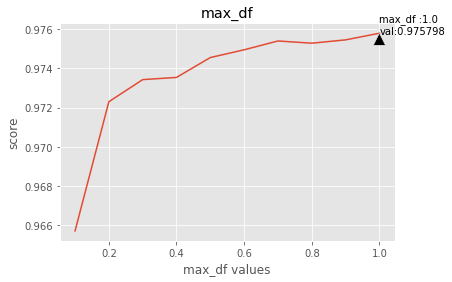

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(dfrq_results.keys())
y=list(dfrq_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'max_df :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
           # xytext=(xmax+.01,ymax)
            )
plt.title('max_df')
plt.xlabel('max_df values')
plt.ylabel('score')
plt.show()

##  ngrams

In [62]:
ngram_results = dict()
ngram_ranges = ((1,2),(1,3),(1,4),(2,3),(2,4))
ngram_ranges

((1, 2), (1, 3), (1, 4), (2, 3), (2, 4))

In [ ]:
svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

In [64]:

for ngram_range in ngram_ranges:
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    svc_tfidf_clf = LinearSVC()
    svc_tfidf_clf.fit(tfidf_train, y_train)
    pred = svc_tfidf_clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)

    print("ngram_range: {} Score: {:.5f}".format(ngram_range, score))
    ngram_results[ngram_range] = score

ngram_range: (1, 2) Score: 0.98116
ngram_range: (1, 3) Score: 0.97997
ngram_range: (1, 4) Score: 0.97783
ngram_range: (2, 3) Score: 0.97512
ngram_range: (2, 4) Score: 0.97360


In [65]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.981


In [66]:
dfrq_results = dict()

dfrq_range = np.arange(0.1,1.1,0.1)
dfrq_range = np.around(dfrq_range, decimals=2)
dfrq_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [67]:
for dfq in dfrq_range: 
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=dfq)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    svc_tfidf_clf = LinearSVC()
    svc_tfidf_clf.fit(tfidf_train, y_train)
    pred = svc_tfidf_clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    print("max_df: {:.2f} Score: {:.5f}".format(dfq, score))
    dfrq_results[dfq] = score

max_df: 0.10 Score: 0.98336
max_df: 0.20 Score: 0.98229
max_df: 0.30 Score: 0.98172
max_df: 0.40 Score: 0.98167
max_df: 0.50 Score: 0.98172
max_df: 0.60 Score: 0.98155
max_df: 0.70 Score: 0.98144
max_df: 0.80 Score: 0.98155
max_df: 0.90 Score: 0.98150
max_df: 1.00 Score: 0.98116


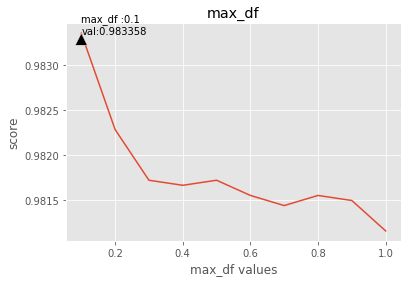

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(dfrq_results.keys())
y=list(dfrq_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'max_df :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
           # xytext=(xmax+.01,ymax)
            )
plt.title('max_df')
plt.xlabel('max_df values')
plt.ylabel('score')
plt.show()

In [69]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.983


In [73]:
c_results = dict()

c_values = np.arange(0.1,1.1,.1)
# c_values = np.around(c_values, decimals=2)
#c_values = [1,2,3,4,5,10,15,20]
c_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [76]:
# c_results = dict()

# c_values = np.arange(1,11,1)
# # c_values = np.around(c_values, decimals=2)
c_values = [1,2,3,4,5,10,15,20]
c_values

[1, 2, 3, 4, 5, 10, 15, 20]

In [77]:
for c in c_values:
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.1)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    

    svc_tfidf_clf = LinearSVC()
    svc_tfidf_clf.fit(tfidf_train, y_train)
    pred = svc_tfidf_clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    print("C value: {:.2f} Score: {:.5f}".format(c, score))
    c_results[c] = score

C value: 1.00 Score: 0.98336
C value: 2.00 Score: 0.98336
C value: 3.00 Score: 0.98336
C value: 4.00 Score: 0.98336
C value: 5.00 Score: 0.98336
C value: 10.00 Score: 0.98336
C value: 15.00 Score: 0.98336
C value: 20.00 Score: 0.98336


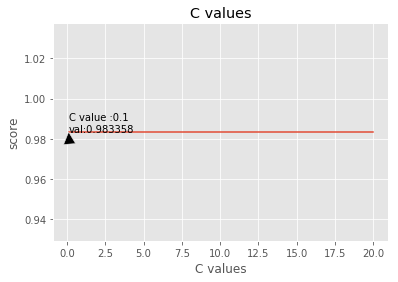

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(c_results.keys())
y=list(c_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'C value :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
            xytext=(xmax+.01,ymax)
            )
plt.title('C values')
plt.xlabel('C values')
plt.ylabel('score')
plt.show()

## Best Results

In [79]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.983


In [81]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      7241
           5       0.99      0.99      0.99     10485

   micro avg       0.98      0.98      0.98     17726
   macro avg       0.98      0.98      0.98     17726
weighted avg       0.98      0.98      0.98     17726



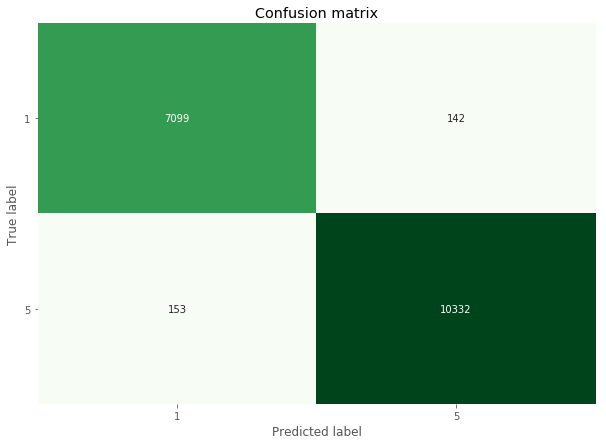

In [83]:
labels = [1,5]
cm = confusion_matrix(y_test, pred,labels=labels)
plt.figure(figsize = (10,7))
g = sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens",xticklabels=True,yticklabels=True)
g.set_yticklabels(labels, rotation =0)
g.set_xticklabels(labels, rotation =0)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## display coefficients


In [86]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())
sorted_coef_index = svc_tfidf_clf.coef_[0].argsort()

In [87]:
print('Highest 10  Coef:')
print('----------------')
for i in feature_names[sorted_coef_index][-10:]:
    print('- {}'.format(i))

Highest 10  Coef:
----------------
- thorough
- friendly and
- thank you
- wonderful
- excellent
- thank
- awesome
- love
- highly recommend
- the best


In [88]:
print('Lowest 10  Coef:')
print('----------------')
for i in feature_names[sorted_coef_index][:10]:
    print('- {}'.format(i))

Lowest 10  Coef:
----------------
- rude
- worst
- horrible
- do not
- unprofessional
- terrible
- not recommend
- money
- should
- was told


In [89]:
#https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    #plt.title('asdf')
    plt.show()

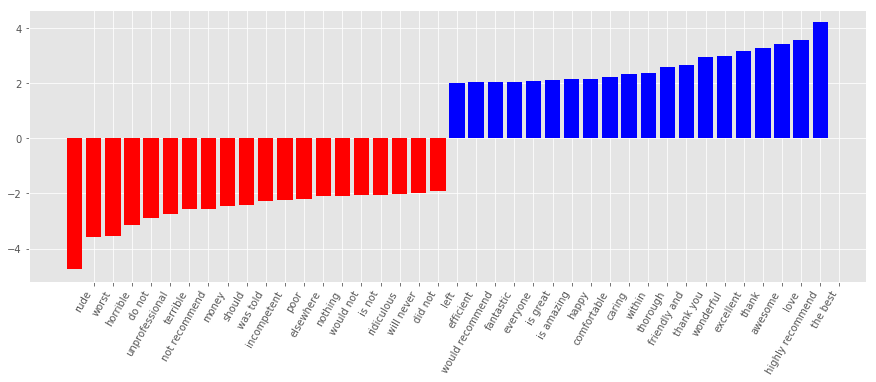

In [90]:
plot_coefficients(svc_tfidf_clf, tfidf_vectorizer.get_feature_names())